In [1]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [3]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img) #Undercomplete Encoding
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

In [4]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
#Fitting/training the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.5316 - accuracy: 0.4471 - val_loss: 0.4611 - val_accuracy: 0.4831
Epoch 2/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.4272 - accuracy: 0.4881 - val_loss: 0.4075 - val_accuracy: 0.4880
Epoch 3/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.3973 - accuracy: 0.4913 - val_loss: 0.3904 - val_accuracy: 0.4901
Epoch 4/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.3809 - accuracy: 0.4939 - val_loss: 0.3745 - val_accuracy: 0.4927
Epoch 5/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.3659 - accuracy: 0.4963 - val_loss: 0.3611 - val_accuracy: 0.4951


In [6]:
#predicting on the test data
prediction = autoencoder.predict(x_test)

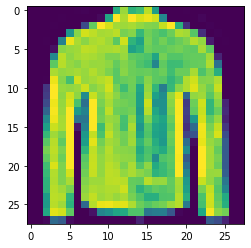

In [7]:
#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

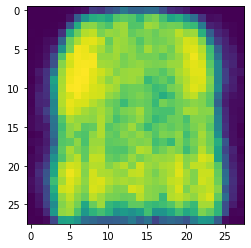

In [8]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

## Add one more hidden layer to autoencoder

In [9]:
# this is our input placeholder
input_img = Input(shape=(784,))
#Adding hidden layer to encoding
hiddenLayer_en=Dense(512,activation='relu')(input_img)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(hiddenLayer_en) #Undercomplete Encoding
#Adding hidden layer to decoding
hiddenLayer_de=Dense(512,activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hiddenLayer_de)


# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#Fitting/training the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 164us/step - loss: 0.4786 - accuracy: 0.4630 - val_loss: 0.3918 - val_accuracy: 0.4869
Epoch 2/5
60000/60000 [==============================] - 10s 159us/step - loss: 0.3750 - accuracy: 0.4931 - val_loss: 0.3665 - val_accuracy: 0.4897
Epoch 3/5
60000/60000 [==============================] - 10s 166us/step - loss: 0.3543 - accuracy: 0.4972 - val_loss: 0.3484 - val_accuracy: 0.5002
Epoch 4/5
60000/60000 [==============================] - 10s 169us/step - loss: 0.3392 - accuracy: 0.5004 - val_loss: 0.3392 - val_accuracy: 0.4955
Epoch 5/5
60000/60000 [==============================] - 10s 160us/step - loss: 0.3288 - accuracy: 0.5022 - val_loss: 0.3263 - val_accuracy: 0.5027


In [10]:
#predicting on the test data
prediction = autoencoder.predict(x_test)

## Do the prediction on the test data and then visualize the reconstructed version of that test data. Also, visualize the same test data before reconstruction using Matplotlib

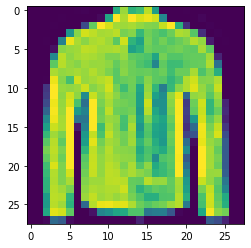

In [11]:
#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

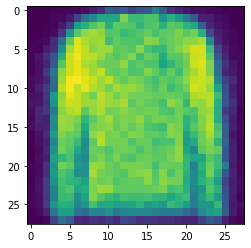

In [12]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

## Repeat the question 2 on the denoisening autoencoder

In [13]:
#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

#Fitting/training the model
history=autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.3290 - accuracy: 0.5020 - val_loss: 0.3150 - val_accuracy: 0.0000e+00
Epoch 2/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.3249 - accuracy: 0.5025 - val_loss: 0.3086 - val_accuracy: 0.0000e+00
Epoch 3/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.3226 - accuracy: 0.5029 - val_loss: 0.3057 - val_accuracy: 0.0000e+00
Epoch 4/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.3207 - accuracy: 0.5032 - val_loss: 0.3033 - val_accuracy: 0.0000e+00
Epoch 5/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.3191 - accuracy: 0.5035 - val_loss: 0.3044 - val_accuracy: 0.0000e+00
Epoch 6/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.3175 - accuracy: 0.5038 - val_loss: 0.2995 - val_accuracy: 0.0000e+00
Epoch 7/10
60000/60000 [========

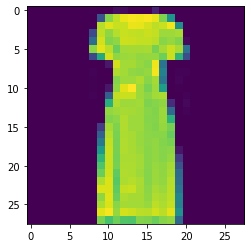

In [14]:
#Before applying Noise to data
from matplotlib import pyplot as plt
plt.imshow(x_train[50].reshape(28,28))
plt.show()

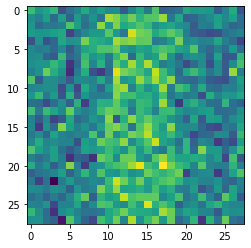

In [15]:
#After Applying Noise to data
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[50].reshape(28,28))
plt.show()

In [16]:
#predicting on the test data
prediction = autoencoder.predict(x_test_noisy) #prediction

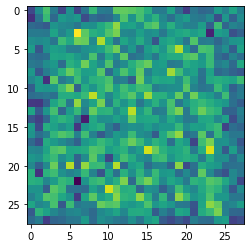

In [17]:
#Input Image After Noise to be predicted
from matplotlib import pyplot as plt
plt.imshow(x_test_noisy[50].reshape(28,28))
plt.show()

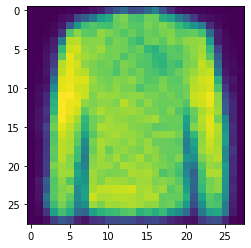

In [18]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

## plot loss and accuracy using the history object

In [19]:
autoencoder.metrics_names

['loss', 'accuracy']

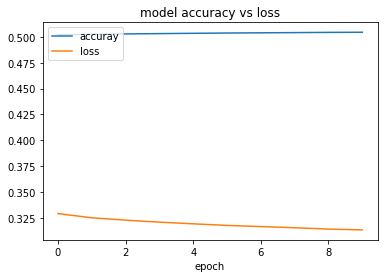

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.legend(['accuray','loss'], loc='upper left')
plt.show()

## Bonus question
1. Visualize the compressed version of the input data in the middle layer

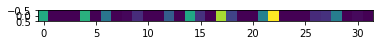

In [21]:

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img) #Undercomplete Encoding

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)



encoder = Model(input_img, encoded)

encoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

encoded_imgs = encoder.predict(x_test[[2],:])

from matplotlib import pyplot as plt
plt.imshow(encoded_imgs)
plt.show()